In [21]:
import numpy as np
import matplotlib.pyplot as plt
from src.network import Network
from src.data import Data
from src.tools import shade
import matplotlib

In [3]:
X = np.transpose(np.genfromtxt("xi.csv", delimiter=","))
Y = np.transpose(np.genfromtxt("tau.csv", delimiter=","))
N = 50

In [22]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
network = Network(N)

train, test = Data.sample(X, Y)
train_errors, test_errors = network.train(train, test, t_max=100)

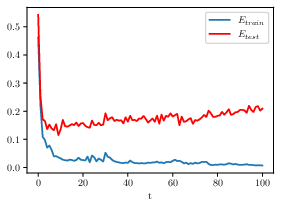

In [27]:
plt.figure(figsize=(4, 3))
plt.plot(train_errors, label="$E_{train}$")
plt.plot(test_errors, label="$E_{test}$", c="red")
plt.xlabel("t")
plt.legend()
plt.tight_layout()
plt.savefig("pictures/train_base_error.pgf")

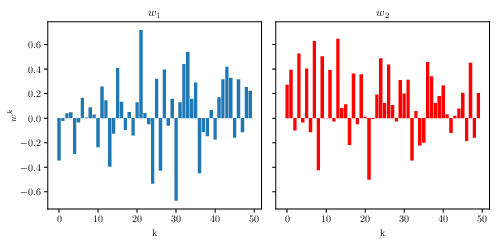

In [28]:
fig, plots = plt.subplots(1, 2, figsize=(7, 3.5), sharey=True)
colors = [None, "red"]
for i, (plot, layer, color) in enumerate(zip(plots, network.layers, colors)):
    plot.bar(np.arange(N), layer.weights, color=color)
    plot.set_xlabel("k")
    plot.set_title(f"$w_{i + 1}$")
plots[0].set_ylabel("$w^k$")
plt.tight_layout()
plt.savefig("pictures/train_base_weight_vectors.pgf")

In [ ]:
fig, plots = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
colors = [None, "red"]
for plot, layer, color in zip(plots, network.layers, colors):
    plot.bar(np.arange(N), layer.weights, color=color)
plt.tight_layout()

In [29]:
P_range = np.array([20, 50, 200, 500, 1000, 2000])
n = 10

train_errors = []
test_errors = []

for P in P_range:
    print(f"Doing {P = }")
    
    train_errors_acc = []
    test_errors_acc = []

    for _ in range(n):
        network = Network(N)
        train, test = Data.sample(X, Y, P=P)
        train_error, test_error = network.train(train, test)

        train_errors_acc.append(train_error)
        test_errors_acc.append(test_error)

    train_errors.append(np.mean(train_errors_acc, axis=0))
    test_errors.append(np.mean(test_errors_acc, axis=0))

Doing P = 20
Doing P = 50
Doing P = 200
Doing P = 500
Doing P = 1000
Doing P = 2000


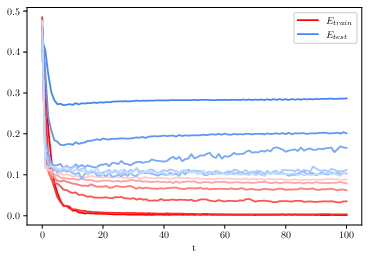

In [32]:
colors = shade("#4287f5", "#c2d9ff", P_range.size)

for i, (train_error, test_error, P, color) in enumerate(zip(train_errors, test_errors, P_range, colors)):
    plt.plot(train_error, c=color, label="$E_{train}$" if i == 0 else None)

colors = shade("#ff0000", "#ffcccc", P_range.size)

for i, (train_error, test_error, P, color) in enumerate(zip(train_errors, test_errors, P_range, colors)):
    plt.plot(test_error, c=color, label="$E_{test}$" if i == 0 else None)

plt.xlabel("t")
plt.legend()
plt.savefig("pictures/effect_p.pgf")

<BarContainer object of 50 artists>

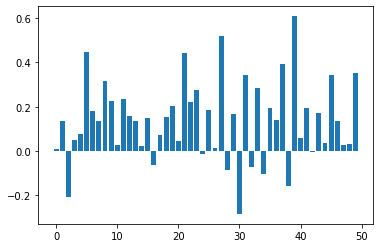

In [ ]:
max_w = None
min_w = None

weights_sum = np.sum([layer.weights for layer in network.layers], axis=0)
plt.bar(np.arange(N), weights_sum)